<h1><font color='blue'>Session 5 - OOP and Other Concepts</font></h1>

"Object Oriented Programming" is one of the hardest concepts in basic programming to get and requires a sound understanding of all the prior concepts. That said, we can go through the basics here so you at least know what a Class is. This will help a lot when you actually go through it in class.

![](https://media.geeksforgeeks.org/wp-content/uploads/20220608174843/OOPS1-282x300.png)

# Section 1 - OOP

Object-oriented programming is a programming paradigm that provides a means of structuring programs so that properties and behaviors are bundled into individual objects.

For instance, an object could represent a person with:
- properties (attributes): 
    - name
    - age
    - address 
- behaviors (methods):
    - walk()
    - talk()
    - breathe()
    - run() 
    
Put another way, object-oriented programming is an approach for modeling concrete, real-world things, like cars, as well as relations between things, like companies and employees, students and teachers, and so on. OOP models real-world entities as software objects that have some data associated with them and can perform certain functions.

![](https://media.geeksforgeeks.org/wp-content/uploads/Blank-Diagram-Page-1-3.png)

The blue print for an object is the Class. A Class determines the basic properties and functions that an object would have. An Object is simply an instance of a Class. We can have multiple Objects all of the same Class, but they are separate instances and keep track of their own data. In the example above, `Dog` is the Class. `Dog 1` is an instance of the `Dog` Class, along with `Dog 2`, `3` and `4`.

Let's make a simple program consisting of a `Soldier` class and a `Weapon` class. Our `Soldier` has a `Name`, some `HP` and `Accuracy` stats, and `arms` himself with a `Weapon` . The `Soldier` can `attack` an enemy `Soldier`, and rolls a random normal distribution. If the value is lower than the `Accuracy`, he misses. Otherwise, the enemy Soldier gets `wound`. If `Soldier` HP decreases below zero, his `status` is now "Dead".

Put into Python terms, the `Soldier` Class has the following attributes:
- `Name`
- `HP`
- `Accuracy`

It also has the following methods:
- `arm`
- `attack`
- `wound`

Our `Weapon` Class has `Damage` and `Accuracy` attributes.

In [1]:
from random import random

class Soldier:
    
    def __init__(self,Name, HP, Accuracy):
        # Also called the constructor. It is a special method that is run when an instance of a class is created.
        # It will take the arguments entered into the class when you initialize it.
        self.Name = Name
        self.HP = HP        
        self.Accuracy = Accuracy
        self.Status = "Alive"
        print(f"Soldier Name:{self.Name} has entered the fray.\nHP:{self.HP}\nAccuracy:{self.Accuracy}")

    
    def arm(self,Weapon):
        # Arm the Soldier with a Weapon
        self.Weapon = Weapon
        print(f"{self.Name} locks and loads his {self.Weapon.Name}")

    def attack(self,Enemy):
        # Attack an enemy Soldier
        if self.Status == "Dead":
            print(f"{self.Name} is dead. Cannot attack.")
        else:
            print(f"{self.Name} aims his {self.Weapon.Name} at {Enemy.Name}")
            roll = random()
            print(f"{self.Name} rolls {roll}")
            if roll < self.Accuracy:                
                Enemy.wound(self.Weapon.Damage)
                
            else:
                print(f"{self.Name} missed a shot.")
    
    def wound(self,damage):
        # Reduce HP by specified amount
        print(f"{self.Name} takes {damage} damage")
        self.HP-=damage
        if self.HP <=0:
            self.Status = "Dead"
            print(f"{self.Name} bites the dust")
            

class Weapon:
    def __init__(self,Name,Damage):
        self.Name=Name
        self.Damage=Damage

In [2]:
Richard = Soldier(Name='Richard',HP=100,Accuracy=0.7)
M16 = Weapon(Name="M16",Damage=30)
Richard.arm(M16)

Jason = Soldier(Name='UberMensch',HP=1000, Accuracy=0.9)
BFG = Weapon(Name="Doom BFG",Damage=9000)
Jason.arm(BFG)

Soldier Name:Richard has entered the fray.
HP:100
Accuracy:0.7
Richard locks and loads his M16
Soldier Name:UberMensch has entered the fray.
HP:1000
Accuracy:0.9
UberMensch locks and loads his Doom BFG


In [3]:
Jason.attack(Richard)

UberMensch aims his Doom BFG at Richard
UberMensch rolls 0.8756244440289468
Richard takes 9000 damage
Richard bites the dust


In [4]:
Richard.attack(Jason)

Richard is dead. Cannot attack.


## 1.1 - Attributes

We need to distinguish between Class attributes and Instance attributes. If an attribute is common to the whole Class and doesn't change with the instances, its a Class attribute. If its an attribute which differs among the instances i.e. you set the attribute when you initialize the instance like the HP in the Soldier Class above, its an Instance Attribute. 

You can access attributes of an instance/object directly simply by calling it.

In [5]:
Richard.HP

-8900

In [6]:
M16.Damage

30

Not recommended but you can modify the values of your attributes simply by assigning them.

In [7]:
M16.Damage = 50
M16.Damage

50

## 1.2 - Methods

Methods are functions specific to the Object. You cannot call them outside of the object. However, you can assign a function object to a class. Let's try defining a `yell()` function and then adding it to a Class.

Note: Remember, the function name without the parentheses is the function object e.g. `yell`. It is only a function call if you add the parentheses e.g. `yell()`

In [8]:
def yell():
    print("EDF! EDF! EDF!")

Jason.shout = yell
Jason.shout()

EDF! EDF! EDF!


Richard has no shout because you have not defined it when the class was defined!

In [9]:
Richard.shout()

AttributeError: 'Soldier' object has no attribute 'shout'

# Section 2 - File I/O 

See [Programiz](https://www.programiz.com/python-programming/file-operation) for more in-depth examples.

What we've done so far is manually creating data and performing operations in memory. It's great for learning the basics. However, you often need to: 
- output your computations to a file for storage
- read files to get inputs for your algorithms
- automate processes

Run the following code if you're running on Colab only, as Google colab's computers aren't directly linked to your Google Drive unless you set it up. You will need login in the pop up widow to authorize Colab to read your Google Drive.

In [10]:
import os

try:
    from google.colab import drive

    drive.mount('/content/drive')
    os.chdir('/content/drive/My Drive/Python Crash Course')

except:
    pass

Run this code to create a folder called data if it does not exist.

In [11]:
if not os.path.exists("data"):
    os.makedirs("data")

!rm -v ./data/*

removed './data/BFG.json'
removed './data/M16.json'
removed './data/jason.json'
removed './data/myfile.txt'
removed './data/pokemon.csv'
removed './data/richard.json'


## 2.1 - Plaintext files

Here we will create a simple text file with a few lines of text and save it to `myfile.txt`.

In [12]:
with open("data/myfile.txt", "x") as f:
    for i in range(10):
        f.write(f"This is Line {i}\n")

This code reads the file `myfile.txt` and outputs the lines to a list.

In [12]:
with open("data/myfile.txt", "r") as f:
    file_data=f.readlines()

file_data

['This is Line 0\n',
 'This is Line 1\n',
 'This is Line 2\n',
 'This is Line 3\n',
 'This is Line 4\n',
 'This is Line 5\n',
 'This is Line 6\n',
 'This is Line 7\n',
 'This is Line 8\n',
 'This is Line 9\n']

A lot of the time there will be special characters when you read a file. You can get rid of them with the `.strip()` method.

In [13]:
file_data_cleaned = list(map(lambda x: x.strip("\n"),file_data))
file_data_cleaned

['This is Line 0',
 'This is Line 1',
 'This is Line 2',
 'This is Line 3',
 'This is Line 4',
 'This is Line 5',
 'This is Line 6',
 'This is Line 7',
 'This is Line 8',
 'This is Line 9']

## 2.2 - JSON

The JavaScript Object Notation (or JSON for short) is a universal format for storing data. It is basically like a Python Dictionary. Most web applications on the internet communicate with each other via sending JSON responses.

We will use a JSON file to save your character into a file, and that "load" it by initializing a Soldier object with the attributes.

In [13]:
import json

richard_soldier_json={'Name':'Richard','HP':100,'Accuracy':0.70}
jason_soldier_json={'Name':'Jason','HP':1000,'Accuracy':0.90}
M16_weapon_json={'Name':'M16','Damage':30}
BFG_weapon_json={'Name':'Doom BFG','Damage':9000}

folder='data'

with open(f"{folder}/richard.json", "w") as f:
    json.dump(richard_soldier_json, f, indent=4)

with open(f"{folder}/jason.json", "w") as f:
    json.dump(jason_soldier_json, f, indent=4)

with open(f"{folder}/M16.json", "w") as f:
    json.dump(M16_weapon_json, f, indent=4)

with open(f"{folder}/BFG.json", "w") as f:
    json.dump(BFG_weapon_json, f, indent=4)

To run command line commands in Jupyter, use an exclamation mark followed by the command. `ls` lists the files in your current working directory (cwd)

In [14]:
!ls

'Python Practice.ipynb'
 README.md
'Session 1 - Atomic Data Types.ipynb'
'Session 2 - Atomic Data Structures.ipynb'
'Session 3 - Flow Control.ipynb'
'Session 4 - Functional Programming.ipynb'
'Session 5 - Object Oriented Programming and Others.ipynb'
'Session 6 - Advanced Topics - Regular Expressions.ipynb'
'Session 7 - Advanced Topics - Numpy.ipynb'
'Session 8 - Advanced Topics - pandas.ipynb'
 data
 regex


We will now load the relevant data from JSON files into our program

In [16]:
with open(f"{folder}/richard.json", 'r') as f:
    richard_data = json.load(f)

with open(f'{folder}/jason.json', 'r') as f:
    jason_data = json.load(f)

with open(f'{folder}/M16.json', 'r') as f:
    M16_data = json.load(f)

with open(f'{folder}/BFG.json', 'r') as f:
    BFG_data = json.load(f)

We now initialize the classes with keyword arguments

In [17]:
richard_loaded = Soldier(**richard_data)
jason_loaded = Soldier(**jason_data)
M16_loaded = Weapon(**M16_data)
BFG_loaded = Weapon(**BFG_data)

richard_loaded.arm(BFG_loaded)
jason_loaded.arm(M16_loaded)

Soldier Name:Richard has entered the fray.
HP:100
Accuracy:0.7
Soldier Name:Jason has entered the fray.
HP:1000
Accuracy:0.9
Richard locks and loads his Doom BFG
Jason locks and loads his M16


Magic! We have programatically created our game from JSON files. We can now edit the files directly, and change the inputs into our program without touching the code!

In [19]:
richard_loaded.attack(jason_loaded)

Richard aims his Doom BFG at Jason
Richard rolls 0.22223781771330475
Jason takes 9000 damage
Jason bites the dust


## 2.3 - `requests`

Probably the most practical skill you'll learn so far. Another way to get data is to get it directly from the internet! Obviously a more advanced solution would yield more results, but we will be sticking to a basic `requests` GET query. See [Dataquest - Introduction to requests](https://www.dataquest.io/blog/tutorial-an-introduction-to-python-requests-library/) for an in-depth tutorial.

We are going to download live taxi data from [data.gov.sg](https://data.gov.sg/dataset/taxi-availability) and visualize it. It will be downloaded in, you guessed it, JSON format!

In [20]:
import requests
from datetime import datetime

now = datetime.now().strftime('%Y-%m-%dT%H:%M:%S')

URL = 'https://api.data.gov.sg/v1/transport/taxi-availability'
r = requests.get(URL,params={'date_time': now})
data=r.json()

### 2.3.1 - Data Cleaning

As an analytics professional you will spend more time preparing data than you do presenting your analysis. Time to get your hands dirty. Start by exploring the structure of the JSON data you just pulled

In [22]:
data.keys()

dict_keys(['type', 'crs', 'features'])

In [23]:
data['features']

[{'type': 'Feature',
  'geometry': {'type': 'MultiPoint',
   'coordinates': [[103.63481, 1.31491],
    [103.65249, 1.32],
    [103.659853233333, 1.30924488333333],
    [103.68863, 1.33921],
    [103.688687, 1.34111216666667],
    [103.69072, 1.2667],
    [103.692207583333, 1.34608875],
    [103.69312, 1.34],
    [103.693499, 1.341669],
    [103.694378483333, 1.34383955],
    [103.696108333333, 1.34547283333333],
    [103.69876, 1.34],
    [103.699251333333, 1.34744833333333],
    [103.69999, 1.35],
    [103.70009, 1.41156],
    [103.70026365, 1.33901053333333],
    [103.700441833333, 1.349718],
    [103.70119, 1.34],
    [103.70357, 1.35],
    [103.70388, 1.35],
    [103.70419, 1.34],
    [103.70589415, 1.34230933333333],
    [103.70684, 1.35],
    [103.7071, 1.33897],
    [103.70849, 1.36216],
    [103.70888, 1.34],
    [103.70897, 1.34609],
    [103.70904, 1.3211],
    [103.70967, 1.3146],
    [103.70993, 1.27564],
    [103.71096, 1.34602],
    [103.714587716667, 1.3461443],
    [103

In [24]:
coordinates = [{'long':taxi[0],'lat':taxi[1]} for taxi in data['features'][0]['geometry']['coordinates']]

In [25]:
import pandas as pd
dataframe = pd.DataFrame(coordinates)
dataframe

,long,lat
0,103.634810,1.314910
1,103.652490,1.320000
2,103.659853,1.309245
3,103.688630,1.339210
4,103.688687,1.341112
...,...,...
1260,103.999530,1.385910
1261,104.002180,1.376190
1262,104.002290,1.375750
1263,104.002520,1.376010


### 2.3.2 - Data Analysis

This dataset is very basic, so analysis is easy. pandas is a powerful tool to do analysis and manipulation. It is a mammoth so we will not go into details here. Just know you can easily do statistical analysis.

In [26]:
dataframe.mean()

long    103.856774
lat       1.352352
dtype: float64

In [27]:
dataframe.max()

long    104.00343
lat       1.46000
dtype: float64

In [28]:
dataframe.min()

long    103.63481
lat       1.24322
dtype: float64

In [29]:
dataframe.describe()

,long,lat
count,1265.000000,1265.000000
mean,103.856774,1.352352
std,0.072690,0.045306
min,103.634810,1.243220
25%,103.813290,1.319080
50%,103.854160,1.350830
75%,103.903150,1.380000
max,104.003430,1.460000


In [30]:
dataframe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   long    1265 non-null   float64
 1   lat     1265 non-null   float64
dtypes: float64(2)
memory usage: 19.9 KB


### 2.3.3 - Data Visualization

`matplotlib` is the most common data visualization tool. It is power and affords you great customization over your graphics. However, it is also a mammoth and will not be covered here.

Text(0.5, 1.0, 'Coordinates of Singapore Taxis as of 2022-12-18T19:22:37')

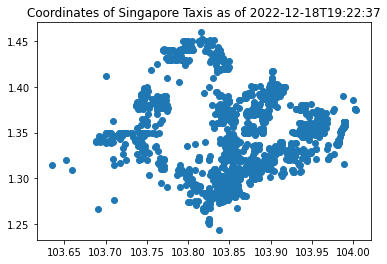

In [36]:
from matplotlib import pyplot as plt

plt.scatter(x=dataframe['long'],y=dataframe['lat'])
plt.title(f"Coordinates of Singapore Taxis as of {now}")